# How should I price auto insurance in the United States?

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15483 entries, 0 to 15482
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         15483 non-null  int64   
 1   state              15483 non-null  category
 2   group_size         15483 non-null  int64   
 3   homeowner          15483 non-null  int64   
 4   car_age            15483 non-null  int64   
 5   car_value          15435 non-null  category
 6   risk_factor        15483 non-null  float64 
 7   age_oldest         15483 non-null  int64   
 8   age_youngest       15483 non-null  int64   
 9   married_couple     15483 non-null  int64   
 10  C_previous         15483 non-null  float64 
 11  duration_previous  15483 non-null  float64 
 12  A                  15483 non-null  category
 13  B                  15483 non-null  category
 14  C                  15483 non-null  category
 15  D                  15483 non-null  category
 16  E   

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head(10)

state  group_size  homeowner  car_age car_value  risk_factor  age_oldest  \
0    OK           1          0        9         f          0.0          24   
1    OK           1          0        9         f          0.0          24   
2    PA           1          1        7         f          0.0          74   
3    PA           1          1        7         f          0.0          74   
4    AR           1          0        4         d          4.0          26   
5    AR           1          0        4         d          4.0          26   
6    AR           1          0        4         d          4.0          26   
7    OK           1          0       13         f          3.0          22   
8    OK           1          0       13         f          3.0          22   
9    OK           1          0       13         f          3.0          22   

   age_youngest  married_couple  C_previous  duration_previous  A  B  C  D  E  \
0            24               0         3.0                9.0  0  0  1  1  0   
1            24               0         3.0                9.0  2  1  1  3  1   
2            74               0         2.0               15.0  2  0  2  3  1   
3            74               0         2.0               15.0  2  0  2  3  1   
4            26               0         3.0                1.0  1  0  1  1  0   
5            26               0         3.0                1.0  1  0  2  1  0   
6            26               0         3.0                1.0  1  0  2  1  0   
7            22               0         0.0                0.0  0  0  1  1  0   
8            22               0         0.0                0.0  2  0  1  1  0   
9            22               0         0.0                0.0  2  0  1  1  0   

   F  G  cost  
0  0  4   543  
1  3  2   611  
2  2  2   691  
3  2  2   695  
4  2  2   628  
5  2  2   625  
6  2  2   628  
7  0  2   596  
8  3  2   711  
9  3  2   722

### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

14


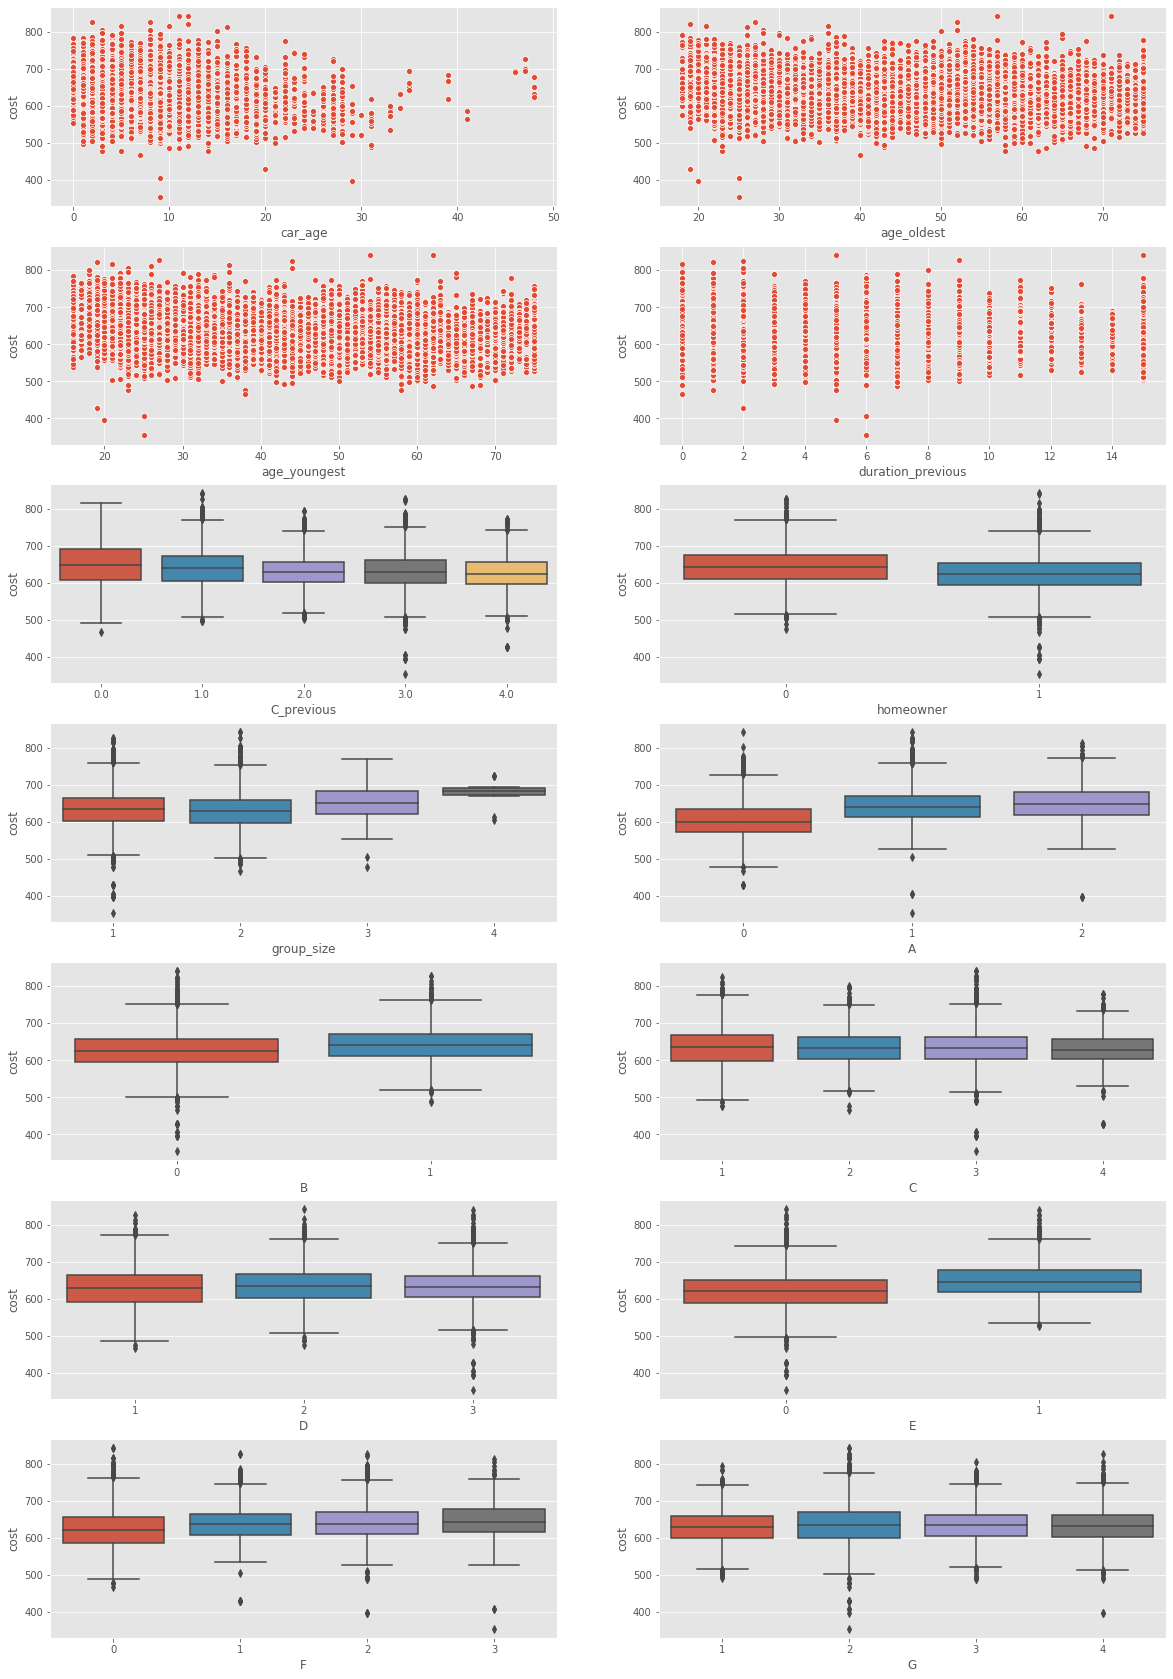

In [6]:
fig = plt.figure(figsize=(20,30))
varInterestList = ["car_age","age_oldest","age_youngest","duration_previous","C_previous","homeowner",
                   "group_size","A","B","C","D","E","F","G"]
print(len(varInterestList))
for i,var in enumerate(varInterestList):
    plt.subplot(7,2,i+1)
    if(var in ["C_previous","homeowner","group_size","A","B","C","D","E","F","G"]):
        sns.boxplot(data=df, x=var,y="cost")
    else:
        sns.scatterplot(data=df, x=var,y="cost")
    

----------

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [7]:
df["duration_previous"] = df["duration_previous"].astype(int)
df["C_previous"] = df["C_previous"].astype(int)
df["risk_factor"] = df["risk_factor"].astype(int)

In [8]:

# dummiyDf = pd.get_dummies(df,columns=["risk_factor","group_size","car_value","state","homeowner", 'married_couple', 'C_previous', 'duration_previous',"A","B","C","D","E","F","G"], drop_first=True) #Use drop_first to drop the first category
dummiyDf = pd.get_dummies(df,columns=["car_value","state","A","B","C","D","E","F","G"], drop_first=True) #Use drop_first to drop the first category
dummiyDf.head()

group_size  homeowner  car_age  risk_factor  age_oldest  age_youngest  \
0           1          0        9            0          24            24   
1           1          0        9            0          24            24   
2           1          1        7            0          74            74   
3           1          1        7            0          74            74   
4           1          0        4            4          26            26   

   married_couple  C_previous  duration_previous  cost  ...  C_4  D_2  D_3  \
0               0           3                  9   543  ...    0    0    0   
1               0           3                  9   611  ...    0    0    1   
2               0           2                 15   691  ...    0    0    1   
3               0           2                 15   695  ...    0    0    1   
4               0           3                  1   628  ...    0    0    0   

   E_1  F_1  F_2  F_3  G_2  G_3  G_4  
0    0    0    0    0    0    0    1  
1    1    0    0    1    1    0    0  
2    1    0    1    0    1    0    0  
3    1    0    1    0    1    0    0  
4    0    0    1    0    1    0    0  

[5 rows x 68 columns]

----------

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

In [9]:
np.random.seed(1337)
lenDf = len(df)
train_ex=np.random.choice(range(lenDf),int(0.8*lenDf),replace=False)
train=dummiyDf.iloc[train_ex].copy()


test_ex=list(set(range(lenDf))-set(train_ex))
test=dummiyDf.iloc[test_ex].copy()
print(train.shape)
print(test.shape)

(12386, 68)
(3097, 68)


----------

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

In [10]:
train.columns

Index(['group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'cost', 'car_value_b', 'car_value_c', 'car_value_d', 'car_value_e',
       'car_value_f', 'car_value_g', 'car_value_h', 'car_value_i', 'state_AR',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_IA', 'state_ID', 'state_IN', 'state_KS', 'state_KY', 'state_MD',
       'state_ME', 'state_MO', 'state_MS', 'state_MT', 'state_ND', 'state_NE',
       'state_NH', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SD', 'state_TN', 'state_UT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY', 'A_1', 'A_2', 'B_1',
       'C_2', 'C_3', 'C_4', 'D_2', 'D_3', 'E_1', 'F_1', 'F_2', 'F_3', 'G_2',
       'G_3', 'G_4'],
      dtype='object')

In [11]:
formula = "cost ~"
for col in dummiyDf.columns:
    if(col in ["cost"]):
        continue
        
    formula += " + {} ".format(col)
print(formula)
modelAll = smf.ols(formula=formula,data=dummiyDf).fit()
print("AIC: ",modelAll.aic)
modelAll.summary()


cost ~ + group_size  + homeowner  + car_age  + risk_factor  + age_oldest  + age_youngest  + married_couple  + C_previous  + duration_previous  + car_value_b  + car_value_c  + car_value_d  + car_value_e  + car_value_f  + car_value_g  + car_value_h  + car_value_i  + state_AR  + state_CO  + state_CT  + state_DC  + state_DE  + state_FL  + state_GA  + state_IA  + state_ID  + state_IN  + state_KS  + state_KY  + state_MD  + state_ME  + state_MO  + state_MS  + state_MT  + state_ND  + state_NE  + state_NH  + state_NM  + state_NV  + state_NY  + state_OH  + state_OK  + state_OR  + state_PA  + state_RI  + state_SD  + state_TN  + state_UT  + state_WA  + state_WI  + state_WV  + state_WY  + A_1  + A_2  + B_1  + C_2  + C_3  + C_4  + D_2  + D_3  + E_1  + F_1  + F_2  + F_3  + G_2  + G_3  + G_4 
AIC:  154592.9184633821


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:17:15   Log-Likelihood:                -77228.
No. Observations:               15483   AIC:                         1.546e+05
Df Residuals:                   15415   BIC:                         1.551e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           675.4716      4.984    135.529      0.000     665.702     685.241
group_size            3.1138      1.324      2.352      0.019       0.519       5.708
homeowner           -14.3674      0.652    -22.034      0.000     -15.646     -13.089
car_age              -0.7299      0.060    -12.159      0.000      -0.848      -0.612
risk_factor          -0.6129      0.205     -2.992      0.003      -1.014      -0.211
age_oldest            0.5899      0.057     10.372      0.000       0.478       0.701
age_youngest         -0.9859      0.056    -17.719      0.000      -1.095      -0.877
married_couple       -9.8212      1.250     -7.860      0.000     -12.270      -7.372
C_previous           -6.1804      0.322    -19.207      0.000      -6.811      -5.550
duration_previous    -1.5081      0.065    -23.103      0.000      -1.636      -1.380
car_value_b         -56.9777      7.083     -8.044      0.000     -70.861     -43.094
car_value_c         -45.5750      4.481    -10.171      0.000     -54.358     -36.792
car_value_d         -39.5906      4.284     -9.242      0.000     -47.987     -31.194
car_value_e         -39.6168      4.262     -9.295      0.000     -47.971     -31.263
car_value_f         -39.8493      4.277     -9.318      0.000     -48.232     -31.466
car_value_g         -35.5735      4.314     -8.245      0.000     -44.030     -27.117
car_value_h         -27.8630      4.488     -6.208      0.000     -36.660     -19.066
car_value_i          -5.6405      5.674     -0.994      0.320     -16.762       5.481
state_AR              1.3792      2.781      0.496      0.620      -4.072       6.830
state_CO             -9.2945      2.285     -4.067      0.000     -13.774      -4.815
state_CT             31.6011      2.572     12.289      0.000      26.560      36.642
state_DC             36.7804      4.334      8.487      0.000      28.286      45.275
state_DE             37.1779      4.118      9.029      0.000      29.107      45.249
state_FL             12.4637      1.923      6.480      0.000       8.694      16.234
state_GA              8.6374      2.124      4.066      0.000       4.474      12.801
state_IA            -50.5828      3.112    -16.255      0.000     -56.682     -44.483
state_ID            -18.3619      3.675     -4.997      0.000     -25.565     -11.159
state_IN            -11.2057      2.288     -4.897      0.000     -15.691      -6.720
state_KS             -7.3087      3.909     -1.870      0.062     -14.972       0.354
state_KY             20.3275      2.546      7.985      0.000      15.338      25.317
state_MD             23.5796      2.214     10.649      0.000      19.239      27.920
state_ME            -33.5905      3.527     -9.525      0.000     -40.503     -26.678
state_MO            -21.7142      2.631     -8.253      0.000     -26.871

----------

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

most expensives:

- NY
- DE

Less expensives:

- IA
- ME

----------

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

- `Group size` The more people in the assurance the more the cost, seems rasonably. each level increases 3 dollars the cost
- `Home owner` seems that for home owners the cost is less, which doesn't make sense to me.
- `car age` seems that for each age for of the car tend to decrease the cost, maybe becaouse of the price of the car is decreasing as well, each year decrease 0.77 dollars the cost
- `Risk factor` Seems that the bigger the facotr the more the price. 

----------

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**
All the variables seem to be stadistically significant except for the column D that got it all of thecategories a p-value greater 0.05.

In [12]:
formula = "cost ~"
for col in dummiyDf.columns:
    if(col in ["cost","D_2","D_3"]):
        continue
  
    formula += " + {} ".format(col)
print(formula)
model_sig = smf.ols(formula=formula,data=dummiyDf).fit()
print("AIC: ",model_sig.aic)
model_sig.summary()



cost ~ + group_size  + homeowner  + car_age  + risk_factor  + age_oldest  + age_youngest  + married_couple  + C_previous  + duration_previous  + car_value_b  + car_value_c  + car_value_d  + car_value_e  + car_value_f  + car_value_g  + car_value_h  + car_value_i  + state_AR  + state_CO  + state_CT  + state_DC  + state_DE  + state_FL  + state_GA  + state_IA  + state_ID  + state_IN  + state_KS  + state_KY  + state_MD  + state_ME  + state_MO  + state_MS  + state_MT  + state_ND  + state_NE  + state_NH  + state_NM  + state_NV  + state_NY  + state_OH  + state_OK  + state_OR  + state_PA  + state_RI  + state_SD  + state_TN  + state_UT  + state_WA  + state_WI  + state_WV  + state_WY  + A_1  + A_2  + B_1  + C_2  + C_3  + C_4  + E_1  + F_1  + F_2  + F_3  + G_2  + G_3  + G_4 
AIC:  154590.38999453775


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     184.9
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:17:16   Log-Likelihood:                -77229.
No. Observations:               15483   AIC:                         1.546e+05
Df Residuals:                   15417   BIC:                         1.551e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           675.1800      4.975    135.725      0.000     665.429     684.931
group_size            3.1366      1.323      2.370      0.018       0.543       5.730
homeowner           -14.3769      0.652    -22.051      0.000     -15.655     -13.099
car_age              -0.7331      0.060    -12.225      0.000      -0.851      -0.616
risk_factor          -0.6175      0.205     -3.015      0.003      -1.019      -0.216
age_oldest            0.5903      0.057     10.380      0.000       0.479       0.702
age_youngest         -0.9856      0.056    -17.715      0.000      -1.095      -0.877
married_couple       -9.8528      1.249     -7.890      0.000     -12.300      -7.405
C_previous           -6.1773      0.322    -19.201      0.000      -6.808      -5.547
duration_previous    -1.5105      0.065    -23.164      0.000      -1.638      -1.383
car_value_b         -57.1262      7.082     -8.067      0.000     -71.007     -43.245
car_value_c         -45.7664      4.478    -10.221      0.000     -54.543     -36.989
car_value_d         -39.7001      4.282     -9.270      0.000     -48.094     -31.306
car_value_e         -39.7173      4.261     -9.321      0.000     -48.069     -31.365
car_value_f         -39.9475      4.276     -9.342      0.000     -48.329     -31.566
car_value_g         -35.6696      4.313     -8.269      0.000     -44.124     -27.215
car_value_h         -27.9554      4.487     -6.230      0.000     -36.751     -19.160
car_value_i          -5.6792      5.673     -1.001      0.317     -16.800       5.441
state_AR              1.5741      2.773      0.568      0.570      -3.862       7.010
state_CO             -9.4403      2.278     -4.143      0.000     -13.906      -4.974
state_CT             31.3397      2.556     12.259      0.000      26.329      36.351
state_DC             36.6883      4.331      8.470      0.000      28.198      45.178
state_DE             37.2308      4.117      9.044      0.000      29.161      45.300
state_FL             12.2493      1.913      6.404      0.000       8.500      15.998
state_GA              8.5134      2.120      4.016      0.000       4.358      12.668
state_IA            -50.7401      3.105    -16.341      0.000     -56.826     -44.654
state_ID            -18.4347      3.674     -5.018      0.000     -25.636     -11.233
state_IN            -11.2679      2.287     -4.926      0.000     -15.751      -6.785
state_KS             -7.3958      3.907     -1.893      0.058     -15.054       0.263
state_KY             20.1559      2.541      7.931      0.000      15.175      25.137
state_MD             23.5495      2.213     10.641      0.000      19.212      27.888
state_ME            -33.7728      3.520     -9.594      0.000     -40.673     -26.872
state_MO            -21.8925      2.625     -8.338      0.000     -27.039

----------

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

In [13]:
formula = "cost ~"
for col in dummiyDf.columns:
    if(col in ["cost","D_2","D_3"]):
        continue

    formula += " + {} ".format(col)
        
    if( col.startswith("car_value")):
        formula+= " + {}*age_youngest".format(col)
               
formula+= "+ age_youngest**2 + car_age**2"
print(formula)
model_sig_plus = smf.ols(formula=formula,data=dummiyDf).fit()
print("AIC: ",model_sig_plus.aic)
model_sig_plus.summary()

cost ~ + group_size  + homeowner  + car_age  + risk_factor  + age_oldest  + age_youngest  + married_couple  + C_previous  + duration_previous  + car_value_b  + car_value_b*age_youngest + car_value_c  + car_value_c*age_youngest + car_value_d  + car_value_d*age_youngest + car_value_e  + car_value_e*age_youngest + car_value_f  + car_value_f*age_youngest + car_value_g  + car_value_g*age_youngest + car_value_h  + car_value_h*age_youngest + car_value_i  + car_value_i*age_youngest + state_AR  + state_CO  + state_CT  + state_DC  + state_DE  + state_FL  + state_GA  + state_IA  + state_ID  + state_IN  + state_KS  + state_KY  + state_MD  + state_ME  + state_MO  + state_MS  + state_MT  + state_ND  + state_NE  + state_NH  + state_NM  + state_NV  + state_NY  + state_OH  + state_OK  + state_OR  + state_PA  + state_RI  + state_SD  + state_TN  + state_UT  + state_WA  + state_WI  + state_WV  + state_WY  + A_1  + A_2  + B_1  + C_2  + C_3  + C_4  + E_1  + F_1  + F_2  + F_3  + G_2  + G_3  + G_4 + age_young

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     165.1
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:17:17   Log-Likelihood:                -77218.
No. Observations:               15483   AIC:                         1.546e+05
Df Residuals:                   15409   BIC:                         1.551e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  690.5111     10.929     63.184      0.000     669.090     711.933
group_size                   3.0962      1.326      2.335      0.020       0.497       5.695
homeowner                  -14.4419      0.653    -22.129      0.000     -15.721     -13.163
car_age                     -0.7278      0.060    -12.122      0.000      -0.845      -0.610
risk_factor                 -0.6246      0.205     -3.049      0.002      -1.026      -0.223
age_oldest                   0.5941      0.057     10.441      0.000       0.483       0.706
age_youngest                -1.3568      0.242     -5.598      0.000      -1.832      -0.882
married_couple              -9.7686      1.250     -7.818      0.000     -12.218      -7.319
C_previous                  -6.1398      0.322    -19.065      0.000      -6.771      -5.509
duration_previous           -1.5155      0.065    -23.223      0.000      -1.643      -1.388
car_value_b               -101.5185     19.612     -5.176      0.000    -139.961     -63.076
car_value_b:age_youngest     1.0165      0.416      2.445      0.015       0.202       1.832
car_value_c                -53.9407     11.267     -4.788      0.000     -76.025     -31.856
car_value_c:age_youngest     0.2008      0.253      0.793      0.428      -0.296       0.697
car_value_d                -59.6032     10.666     -5.588      0.000     -80.511     -38.696
car_value_d:age_youngest     0.4850      0.239      2.029      0.043       0.016       0.954
car_value_e                -54.7363     10.612     -5.158      0.000     -75.538     -33.935
car_value_e:age_youngest     0.3699      0.238      1.557      0.119      -0.096       0.835
car_value_f                -54.1241     10.638     -5.088      0.000     -74.976     -33.272
car_value_f:age_youngest     0.3507      0.238      1.473      0.141      -0.116       0.817
car_value_g                -47.5944     10.755     -4.425      0.000     -68.675     -26.514
car_value_g:age_youngest     0.2995      0.240      1.245      0.213      -0.172       0.771
car_value_h                -41.5241     11.480     -3.617      0.000     -64.027     -19.021
car_value_h:age_youngest     0.3393      0.252      1.347      0.178      -0.154       0.833
car_value_i                  2.2808     18.460      0.124      0.902     -33.904      38.465
car_value_i:age_youngest    -0.0938      0.378     -0.248      0.804      -0.834       0.647
state_AR                     1.4474      2.779      0.521      0.603      -4.001       6.895
state_CO                    -9.7309      2.282     -4.265      0.000     -14.203      -5.259
state_CT                    30.7851      2.561     12.023      0.000      25.766      35.804
state_DC                    36.3597      4.332      8.393      0.000      27.868      44.851
state_DE      

----------

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [14]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

State State Code     Region            Division
0                 Alaska         AK       West             Pacific
1                Alabama         AL      South  East South Central
2               Arkansas         AR      South  West South Central
3                Arizona         AZ       West            Mountain
4             California         CA       West             Pacific
5               Colorado         CO       West            Mountain
6            Connecticut         CT  Northeast         New England
7   District of Columbia         DC      South      South Atlantic
8               Delaware         DE      South      South Atlantic
9                Florida         FL      South      South Atlantic
10               Georgia         GA      South      South Atlantic
11                Hawaii         HI       West             Pacific
12                  Iowa         IA    Midwest  West North Central
13                 Idaho         ID       West            Mountain
14              Illinois         IL    Midwest  East North Central
15               Indiana         IN    Midwest  East North Central
16                Kansas         KS    Midwest  West North Central
17              Kentucky         KY      South  East South Central
18             Louisiana         LA      South  West South Central
19         Massachusetts         MA  Northeast         New England
20              Maryland         MD      South      South Atlantic
21                 Maine         ME  Northeast         New England
22              Michigan         MI    Midwest  East North Central
23             Minnesota         MN    Midwest  West North Central
24              Missouri         MO    Midwest  West North Central
25           Mississippi         MS      South  East South Central
26               Montana         MT       West            Mountain
27        North Carolina         NC      South      South Atlantic
28          North Dakota         ND    Midwest  West North Central
29              Nebraska         NE    Midwest  West North Central
30         New Hampshire         NH  Northeast         New England
31            New Jersey         NJ  Northeast     Middle Atlantic
32            New Mexico         NM       West            Mountain
33                Nevada         NV       West            Mountain
34              New York         NY  Northeast     Middle Atlantic
35                  Ohio         OH    Midwest  East North Central
36              Oklahoma         OK      South  West South Central
37                Oregon         OR       West             Pacific
38          Pennsylvania         PA  Northeast     Middle Atlantic
39          Rhode Island         RI  Northeast         New England
40        South Carolina         SC      South      South Atlantic
41          South Dakota         SD    Midwest  West North Central
42             Tennessee         TN      South  East South Central
43                 Texas         TX      South  West South Central
44                  Utah         UT       West            Mountain
45              Virginia         VA      South      South Atlantic
46               Vermont         VT  Northeast         New England
47            Washington         WA       West             Pacific
48             Wisconsin         WI    Midwest  East North Central
49         West Virginia         WV      South      South Atlantic
50               Wyoming         WY       West            Mountain

### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [15]:
mergedDf = df.merge(state_regions, how="inner",left_on="state",right_on="State Code")

mergedDf.drop(["State","State Code","Division"],axis=1,inplace=True)
mergedDf.head()

state  group_size  homeowner  car_age car_value  risk_factor  age_oldest  \
0    OK           1          0        9         f            0          24   
1    OK           1          0        9         f            0          24   
2    OK           1          0       13         f            3          22   
3    OK           1          0       13         f            3          22   
4    OK           1          0       13         f            3          22   

   age_youngest  married_couple  C_previous  duration_previous  A  B  C  D  E  \
0            24               0           3                  9  0  0  1  1  0   
1            24               0           3                  9  2  1  1  3  1   
2            22               0           0                  0  0  0  1  1  0   
3            22               0           0                  0  2  0  1  1  0   
4            22               0           0                  0  2  0  1  1  0   

   F  G  cost Region  
0  0  4   543  South  
1  3  2   611  South  
2  0  2   596  South  
3  3  2   711  South  
4  3  2   722  South

In [16]:
dummiyMergedDf = pd.get_dummies(mergedDf,columns=["car_value","Region","A","B","C","E","F","G"], drop_first=True) #Use drop_first to drop the first category
dummiyMergedDf.columns

Index(['state', 'group_size', 'homeowner', 'car_age', 'risk_factor',
       'age_oldest', 'age_youngest', 'married_couple', 'C_previous',
       'duration_previous', 'D', 'cost', 'car_value_b', 'car_value_c',
       'car_value_d', 'car_value_e', 'car_value_f', 'car_value_g',
       'car_value_h', 'car_value_i', 'Region_Northeast', 'Region_South',
       'Region_West', 'A_1', 'A_2', 'B_1', 'C_2', 'C_3', 'C_4', 'E_1', 'F_1',
       'F_2', 'F_3', 'G_2', 'G_3', 'G_4'],
      dtype='object')

----------

#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [17]:
formula = "cost ~"
for col in dummiyMergedDf.columns:
    if(col in ["cost","D","state"]):
        continue
        
    formula += " + {} ".format(col)
        
    if( col.startswith("car_value")):
        formula+= " + {}*age_youngest".format(col)
formula+= "+ age_youngest**2 + car_age**2"
print(formula)
model_sig_plus = smf.ols(formula=formula,data=dummiyMergedDf).fit()
model_sig_plus.summary()

cost ~ + group_size  + homeowner  + car_age  + risk_factor  + age_oldest  + age_youngest  + married_couple  + C_previous  + duration_previous  + car_value_b  + car_value_b*age_youngest + car_value_c  + car_value_c*age_youngest + car_value_d  + car_value_d*age_youngest + car_value_e  + car_value_e*age_youngest + car_value_f  + car_value_f*age_youngest + car_value_g  + car_value_g*age_youngest + car_value_h  + car_value_h*age_youngest + car_value_i  + car_value_i*age_youngest + Region_Northeast  + Region_South  + Region_West  + A_1  + A_2  + B_1  + C_2  + C_3  + C_4  + E_1  + F_1  + F_2  + F_3  + G_2  + G_3  + G_4 + age_youngest**2 + car_age**2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     218.5
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:17:19   Log-Likelihood:                -78149.
No. Observations:               15483   AIC:                         1.564e+05
Df Residuals:                   15441   BIC:                         1.567e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  673.3312     11.341     59.373      0.000     651.102     695.560
group_size                   1.2353      1.400      0.882      0.378      -1.509       3.979
homeowner                  -15.1528      0.682    -22.206      0.000     -16.490     -13.815
car_age                     -0.7140      0.063    -11.285      0.000      -0.838      -0.590
risk_factor                  0.4299      0.203      2.115      0.034       0.032       0.828
age_oldest                   0.6501      0.060     10.825      0.000       0.532       0.768
age_youngest                -1.3536      0.256     -5.291      0.000      -1.855      -0.852
married_couple              -8.5229      1.320     -6.455      0.000     -11.111      -5.935
C_previous                  -6.6184      0.337    -19.616      0.000      -7.280      -5.957
duration_previous           -1.4424      0.069    -21.001      0.000      -1.577      -1.308
car_value_b                -91.0354     20.662     -4.406      0.000    -131.536     -50.535
car_value_b:age_youngest     0.8577      0.439      1.956      0.051      -0.002       1.717
car_value_c                -50.5888     11.888     -4.255      0.000     -73.891     -27.287
car_value_c:age_youngest     0.1689      0.268      0.631      0.528      -0.356       0.693
car_value_d                -59.3521     11.248     -5.277      0.000     -81.399     -37.305
car_value_d:age_youngest     0.5090      0.252      2.016      0.044       0.014       1.004
car_value_e                -51.8970     11.178     -4.643      0.000     -73.807     -29.987
car_value_e:age_youngest     0.3346      0.251      1.334      0.182      -0.157       0.826
car_value_f                -50.2807     11.205     -4.487      0.000     -72.244     -28.318
car_value_f:age_youngest     0.3014      0.251      1.199      0.231      -0.191       0.794
car_value_g                -44.5360     11.321     -3.934      0.000     -66.727     -22.345
car_value_g:age_youngest     0.2573      0.254      1.014      0.311      -0.240       0.755
car_value_h                -33.8249     12.080     -2.800      0.005     -57.503     -10.147
car_value_h:age_youngest     0.1900      0.266      0.715      0.474      -0.331       0.711
car_value_i                  6.1979     19.530      0.317      0.751     -32.084      44.479
car_value_i:age_youngest    -0.1185      0.400     -0.296      0.767      -0.902       0.665
Region_Northeast            31.9913      1.110     28.826      0.000      29.816      34.167
Region_South                23.8415      0.933     25.541      0.000      22.012      25.671
Region_West                 14.1410      1.080     13.089      0.000      12.023      16.259
A_1                         39.5162      1.264     31.253      0.000      37.038      41.995
A_2           

----------

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**
Avoid correlated variables 

----------

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

In [18]:
dummiyMergedDf.columns

Index(['state', 'group_size', 'homeowner', 'car_age', 'risk_factor',
       'age_oldest', 'age_youngest', 'married_couple', 'C_previous',
       'duration_previous', 'D', 'cost', 'car_value_b', 'car_value_c',
       'car_value_d', 'car_value_e', 'car_value_f', 'car_value_g',
       'car_value_h', 'car_value_i', 'Region_Northeast', 'Region_South',
       'Region_West', 'A_1', 'A_2', 'B_1', 'C_2', 'C_3', 'C_4', 'E_1', 'F_1',
       'F_2', 'F_3', 'G_2', 'G_3', 'G_4'],
      dtype='object')

married_couple  homeowner   car_age  age_oldest  \
married_couple           1.000000   0.190645 -0.040803    0.207119   
homeowner                0.190645   1.000000 -0.051016    0.403996   
car_age                 -0.040803  -0.051016  1.000000   -0.026542   
age_oldest               0.207119   0.403996 -0.026542    1.000000   
age_youngest             0.103528   0.351993 -0.028675    0.917221   
group_size               0.776446   0.192084 -0.034486    0.213013   
risk_factor             -0.012767   0.079994 -0.039308    0.062724   
duration_previous        0.071656   0.175860 -0.060889    0.275785   

                   age_youngest  group_size  risk_factor  duration_previous  
married_couple         0.103528    0.776446    -0.012767           0.071656  
homeowner              0.351993    0.192084     0.079994           0.175860  
car_age               -0.028675   -0.034486    -0.039308          -0.060889  
age_oldest             0.917221    0.213013     0.062724           0.275785  
age_youngest           1.000000   -0.027521     0.054189           0.247515  
group_size            -0.027521    1.000000     0.001880           0.085545  
risk_factor            0.054189    0.001880     1.000000           0.099088  
duration_previous      0.247515    0.085545     0.099088           1.000000

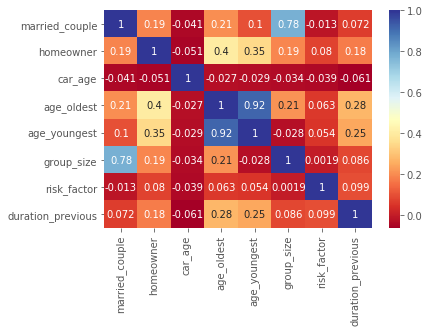

In [19]:
correlations = dummiyMergedDf[["married_couple","homeowner","car_age","age_oldest","age_youngest","group_size","risk_factor","duration_previous"]].corr()

sns.heatmap(correlations,cmap="RdYlBu",annot=True)
correlations

----------

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

In [20]:

formula = "cost ~"
for col in dummiyMergedDf.columns:
    if(col in ["cost","D","state","age_oldest","married_couple","homeowner"]):
        continue

    formula += " + {} ".format(col)
        
    if( col.startswith("car_value")):
        formula+= " + {}*age_youngest".format(col)
formula+= "+ age_youngest**2 + car_age**2"
print(formula)
model_region_no_oldest = smf.ols(formula=formula,data=dummiyMergedDf).fit()
model_region_no_oldest.summary()

cost ~ + group_size  + car_age  + risk_factor  + age_youngest  + C_previous  + duration_previous  + car_value_b  + car_value_b*age_youngest + car_value_c  + car_value_c*age_youngest + car_value_d  + car_value_d*age_youngest + car_value_e  + car_value_e*age_youngest + car_value_f  + car_value_f*age_youngest + car_value_g  + car_value_g*age_youngest + car_value_h  + car_value_h*age_youngest + car_value_i  + car_value_i*age_youngest + Region_Northeast  + Region_South  + Region_West  + A_1  + A_2  + B_1  + C_2  + C_3  + C_4  + E_1  + F_1  + F_2  + F_3  + G_2  + G_3  + G_4 + age_youngest**2 + car_age**2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     208.5
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:17:22   Log-Likelihood:                -78485.
No. Observations:               15483   AIC:                         1.570e+05
Df Residuals:                   15444   BIC:                         1.573e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  675.4927     11.519     58.641      0.000     652.914     698.072
group_size                  -1.8067      0.693     -2.607      0.009      -3.165      -0.448
car_age                     -0.6863      0.065    -10.618      0.000      -0.813      -0.560
risk_factor                  0.3215      0.207      1.551      0.121      -0.085       0.728
age_youngest                -0.7957      0.255     -3.126      0.002      -1.295      -0.297
C_previous                  -6.6719      0.345    -19.366      0.000      -7.347      -5.997
duration_previous           -1.4416      0.070    -20.638      0.000      -1.578      -1.305
car_value_b                -89.6845     21.111     -4.248      0.000    -131.064     -48.305
car_value_b:age_youngest     0.7052      0.448      1.574      0.115      -0.173       1.583
car_value_c                -46.2369     12.146     -3.807      0.000     -70.045     -22.429
car_value_c:age_youngest     0.0706      0.273      0.258      0.796      -0.465       0.607
car_value_d                -54.5519     11.491     -4.747      0.000     -77.076     -32.028
car_value_d:age_youngest     0.3800      0.258      1.473      0.141      -0.126       0.886
car_value_e                -46.8668     11.420     -4.104      0.000     -69.251     -24.483
car_value_e:age_youngest     0.2054      0.256      0.802      0.423      -0.297       0.708
car_value_f                -45.7540     11.448     -3.997      0.000     -68.193     -23.315
car_value_f:age_youngest     0.1482      0.257      0.577      0.564      -0.355       0.652
car_value_g                -43.7791     11.567     -3.785      0.000     -66.452     -21.106
car_value_g:age_youngest     0.1613      0.259      0.622      0.534      -0.347       0.669
car_value_h                -30.4892     12.343     -2.470      0.014     -54.682      -6.296
car_value_h:age_youngest     0.0398      0.271      0.147      0.883      -0.492       0.572
car_value_i                  9.1924     19.949      0.461      0.645     -29.909      48.294
car_value_i:age_youngest    -0.2906      0.408     -0.712      0.477      -1.091       0.510
Region_Northeast            31.8279      1.133     28.104      0.000      29.608      34.048
Region_South                23.0730      0.953     24.208      0.000      21.205      24.941
Region_West                 13.9789      1.104     12.668      0.000      11.816      16.142
A_1                         39.4025      1.292     30.504      0.000      36.871      41.934
A_2                         45.1193      1.599     28.223      0.000      41.986      48.253
B_1                          1.9200      0.745      2.576      0.010       0.459       3.381
C_2                         -0.2492      0.918     -0.272      0.786      -2.048       1.550
C_3           

----------

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)


**Answer.**

In [21]:
my_resid = dummiyMergedDf.cost - model_region_no_oldest.fittedvalues
# check that the differences between my residuals and the 
# precomputed ones are all zero (within numerical rounding error):
np.allclose(my_resid, model_region_no_oldest.resid) # should return True

True

In [22]:
from scipy import stats

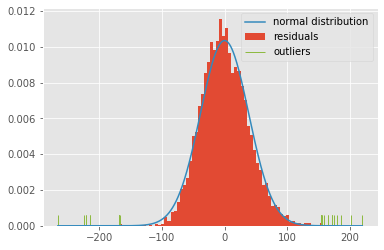

In [24]:
plt.hist(model_region_no_oldest.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )
# now plot the normal distribution for comparison
xx = np.linspace(model_region_no_oldest.resid.min(), model_region_no_oldest.resid.max(), num=1000)
plt.plot(xx, stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model_region_no_oldest.scale)),
    label="normal distribution")
outliers = np.abs(model_region_no_oldest.resid)>4*np.sqrt(model_region_no_oldest.scale)
sns.rugplot(model_region_no_oldest.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right");

----------

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

In [25]:
val, lamb = stats.boxcox(dummiyMergedDf.cost)
print(lamb)

0.5328142693806147


----------

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

In [26]:

formula = "np.sqrt(cost)  ~"
for col in dummiyMergedDf.columns:
    if(col in ["cost","D","state","age_oldest","married_couple","homeowner"]):
        continue

    formula += " + {} ".format(col)
        
    if( col.startswith("car_value")):
        formula+= " + {}*age_youngest".format(col)
formula+= "+ age_youngest**2 + car_age**2"
print(formula)
model_region_no_oldest = smf.ols(formula=formula,data=dummiyMergedDf).fit()
model_region_no_oldest.summary()

np.sqrt(cost)  ~ + group_size  + car_age  + risk_factor  + age_youngest  + C_previous  + duration_previous  + car_value_b  + car_value_b*age_youngest + car_value_c  + car_value_c*age_youngest + car_value_d  + car_value_d*age_youngest + car_value_e  + car_value_e*age_youngest + car_value_f  + car_value_f*age_youngest + car_value_g  + car_value_g*age_youngest + car_value_h  + car_value_h*age_youngest + car_value_i  + car_value_i*age_youngest + Region_Northeast  + Region_South  + Region_West  + A_1  + A_2  + B_1  + C_2  + C_3  + C_4  + E_1  + F_1  + F_2  + F_3  + G_2  + G_3  + G_4 + age_youngest**2 + car_age**2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(cost)   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     210.5
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:48:25   Log-Likelihood:                -17784.
No. Observations:               15483   AIC:                         3.565e+04
Df Residuals:                   15444   BIC:                         3.594e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   25.9569      0.228    113.627      0.000      25.509      26.405
group_size                  -0.0385      0.014     -2.800      0.005      -0.065      -0.012
car_age                     -0.0137      0.001    -10.673      0.000      -0.016      -0.011
risk_factor                  0.0055      0.004      1.329      0.184      -0.003       0.014
age_youngest                -0.0153      0.005     -3.030      0.002      -0.025      -0.005
C_previous                  -0.1327      0.007    -19.423      0.000      -0.146      -0.119
duration_previous           -0.0284      0.001    -20.503      0.000      -0.031      -0.026
car_value_b                 -1.8288      0.419     -4.368      0.000      -2.649      -1.008
car_value_b:age_youngest     0.0142      0.009      1.601      0.109      -0.003       0.032
car_value_c                 -0.9022      0.241     -3.745      0.000      -1.374      -0.430
car_value_c:age_youngest     0.0010      0.005      0.183      0.855      -0.010       0.012
car_value_d                 -1.0605      0.228     -4.654      0.000      -1.507      -0.614
car_value_d:age_youngest     0.0070      0.005      1.370      0.171      -0.003       0.017
car_value_e                 -0.9122      0.226     -4.028      0.000      -1.356      -0.468
car_value_e:age_youngest     0.0036      0.005      0.714      0.475      -0.006       0.014
car_value_f                 -0.8918      0.227     -3.928      0.000      -1.337      -0.447
car_value_f:age_youngest     0.0025      0.005      0.496      0.620      -0.007       0.013
car_value_g                 -0.8530      0.229     -3.718      0.000      -1.303      -0.403
car_value_g:age_youngest     0.0028      0.005      0.535      0.593      -0.007       0.013
car_value_h                 -0.5902      0.245     -2.411      0.016      -1.070      -0.110
car_value_h:age_youngest     0.0004      0.005      0.066      0.947      -0.010       0.011
car_value_i                  0.1351      0.396      0.341      0.733      -0.640       0.911
car_value_i:age_youngest    -0.0051      0.008     -0.633      0.527      -0.021       0.011
Region_Northeast             0.6378      0.022     28.399      0.000       0.594       0.682
Region_South                 0.4642      0.019     24.561      0.000       0.427       0.501
Region_West                  0.2836      0.022     12.960      0.000       0.241       0.327
A_1                          0.7891      0.026     30.803      0.000       0.739       0.839
A_2                          0.8996      0.032     28.374      0.000       0.837       0.962
B_1                          0.0401      0.015      2.712      0.007       0.011       0.069
C_2                      -1.113e-05      0.018     -0.001      1.000      -0.036       0.036
C_3           

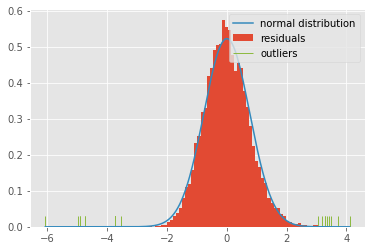

In [28]:
plt.hist(model_region_no_oldest.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )
# now plot the normal distribution for comparison
xx = np.linspace(model_region_no_oldest.resid.min(), model_region_no_oldest.resid.max(), num=1000)
plt.plot(xx, stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model_region_no_oldest.scale)),
    label="normal distribution")
outliers = np.abs(model_region_no_oldest.resid)>4*np.sqrt(model_region_no_oldest.scale)
sns.rugplot(model_region_no_oldest.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right");

----------

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 